<a href="https://colab.research.google.com/github/cromcruach52/Pandas-Numpy-References/blob/main/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagging

In [ ]:
!pip install mlxtend

In [ ]:
from sklearn.datasets import load_iris

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions


In [ ]:
data = load_iris()

In [ ]:
data.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
d = {
    'sepal length (cm)': data.data[50:,1],
    'petal length (cm)': data.data[50:,2],
    'Species': np.array([i for i in data.target if i> 0])
}

In [ ]:
df = pd.DataFrame(d)
df

,sepal length (cm),petal length (cm),Species
0,3.2,4.7,1
1,3.2,4.5,1
2,3.1,4.9,1
3,2.3,4.0,1
4,2.8,4.6,1
...,...,...,...
95,3.0,5.2,2
96,2.5,5.0,2
97,3.0,5.2,2
98,3.4,5.4,2


In [ ]:
# Shuffling the data set

df = df.sample(df.shape[0])
df

,sepal length (cm),petal length (cm),Species
89,3.1,5.4,2
2,3.1,4.9,1
41,3.0,4.6,1
9,2.7,3.9,1
81,3.8,6.4,2
...,...,...,...
10,2.0,3.5,1
38,3.0,4.1,1
44,2.7,4.2,1
99,3.0,5.1,2


In [ ]:
df_train = df.iloc[:60,:].sample(10)

df_test = df.iloc[:61,:].sample(10)


In [ ]:
df_tt = df_train.sample(5, replace = True)
X_test = df_tt.iloc[:,:-1]
y_test = df_tt.iloc[:,-1].values

In [ ]:
# models - > Random Samples

def evaluate(model, X, y):
  model.fit(X,y)
  plot_tree(model)

  plt.show()
  plot_decision_regions(X, y, model, legend = 2)
  plt.show()

  y_pred = model.predict(X_test)

  print("y_test:", y_test)
  print("y_pred:", y_pred)

  print("accuracy score", accuracy_score(y_test, y_pred)*100)

  return model

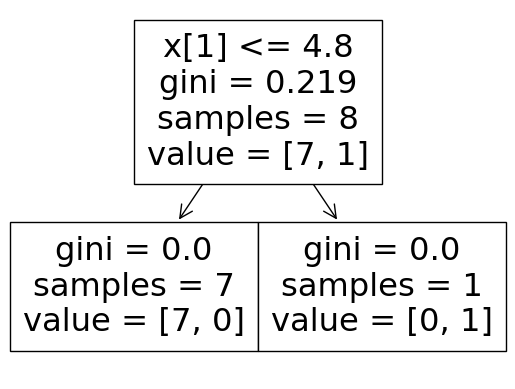

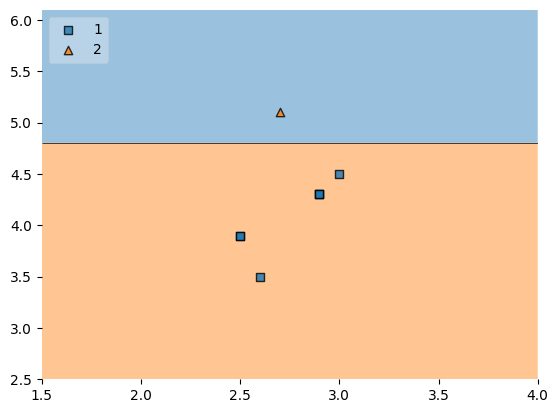

y_test: [1 1 2 1 1]
y_pred: [1 1 2 1 1]
accuracy score 100.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# First decision tree

df_t = df_train.sample(8, replace = True)

X_train = df_t.iloc[:,:-1].values
y_train = df_t.iloc[:,-1].values

dt = DecisionTreeClassifier()
bag1 = evaluate(dt, X_train, y_train)

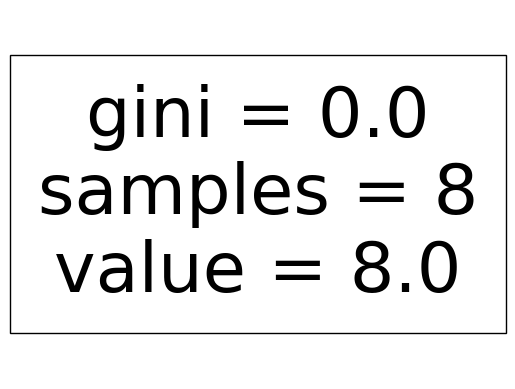

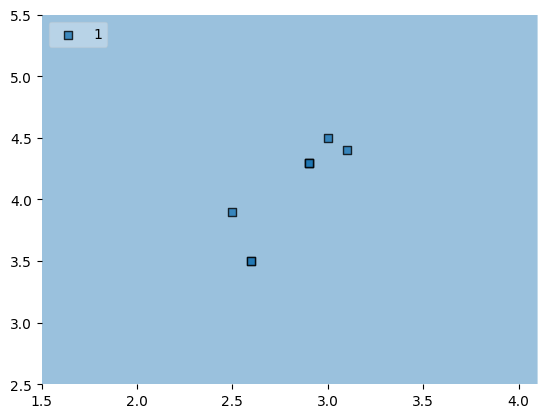

y_test: [1 1 2 1 1]
y_pred: [1 1 1 1 1]
accuracy score 80.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# Second decision tree

df_t = df_train.sample(8, replace = True)

X_train = df_t.iloc[:,:-1].values
y_train = df_t.iloc[:,-1].values

dt = DecisionTreeClassifier()
bag2 = evaluate(dt, X_train, y_train)

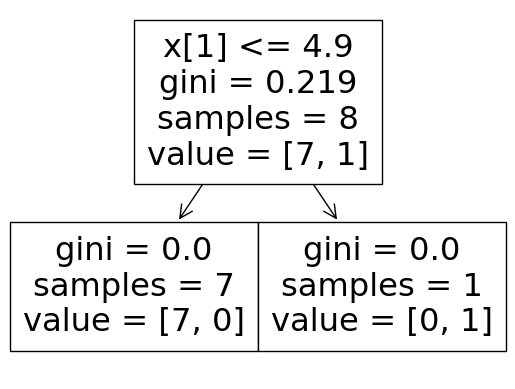

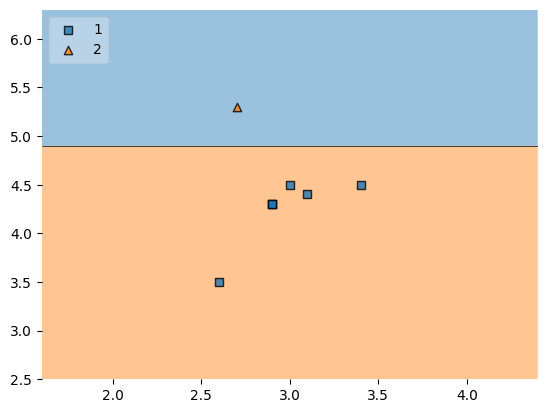

y_test: [1 1 2 1 1]
y_pred: [1 1 2 1 1]
accuracy score 100.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# Third Tree

df_t = df_train.sample(8, replace = True)

X_train = df_t.iloc[:,:-1].values
y_train = df_t.iloc[:,-1].values

dt = DecisionTreeClassifier()
bag3 = evaluate(dt, X_train, y_train)

In [ ]:
# Aggrigation

print("Prediction 1" ,bag1.predict(np.array([2.5, 4.9]).reshape(1,2)))
print("Prediction 2" ,bag2.predict(np.array([2.5, 4.9]).reshape(1,2)))
print("Prediction 3" ,bag3.predict(np.array([2.5, 4.9]).reshape(1,2)))

Prediction 1 [2]
Prediction 2 [1]
Prediction 3 [1]


# Voting / Stacking


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
m1 = KNeighborsClassifier()
m2 = LogisticRegression()
m3 = MultinomialNB()
m4 = GaussianNB()
m5 = DecisionTreeClassifier()


In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
model = VotingClassifier([('knn',m1),('lr',m2),('mn',m3),('gn',m4),('dt',m5)])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1].values, df.iloc[:, -1].values, test_size = 0.33, random_state = 42)


In [ ]:
model.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('lr', LogisticRegression()),
                             ('mn', MultinomialNB()), ('gn', GaussianNB()),
                             ('dt', DecisionTreeClassifier())])

In [ ]:
model.score(X_train, y_train)*100

94.02985074626866

In [ ]:
model.score(X_test, y_test)*100

87.87878787878788

# Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
abc = AdaBoostClassifier(n_estimators=4, random_state=0)
abc.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=4, random_state=0)

In [ ]:
y_pred = abc.predict(X_test)

In [ ]:
abc.score(X_test, y_test)*100

87.87878787878788

In [ ]:
accuracy_score(y_test, y_pred)*100

87.87878787878788